In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(os.path.abspath('../input/cleaned-featured-2008-2017.csv'))

In [5]:
df.columns.values

array(['p_fs', 'p_w1sp', 'p_w2sp', 'p_wrp', 'p_tpw', 'p_tmw',
       'p_aces_per_game', 'p_df_per_game', 'p_bp_won', 'p_wsp',
       'p_completeness', 'p_serve_adv', 'p_number_of_matches_used',
       'o_fs', 'o_w1sp', 'o_w2sp', 'o_wrp', 'o_tpw', 'o_tmw',
       'o_aces_per_game', 'o_df_per_game', 'o_bp_won', 'o_wsp',
       'o_completeness', 'o_serve_adv', 'direct',
       'o_number_of_matches_used', 'player_id', 'opponent_id',
       'tournament_name', 'date', 'p_matches'], dtype=object)

In [6]:
number_of_matches = df['p_number_of_matches_used'].append(df['o_number_of_matches_used'], ignore_index=True)

In [7]:
number_of_matches.describe()

count    104404.000000
mean        182.384525
std         158.669015
min           1.000000
25%          59.000000
50%         138.000000
75%         265.000000
max         830.000000
dtype: float64

Density function :

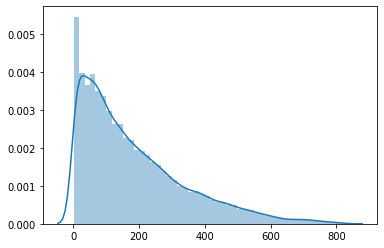

In [9]:
sns.distplot(number_of_matches)
plt.show()

Cumulative distribution function :

In [10]:
cdf = number_of_matches.value_counts().sort_index()

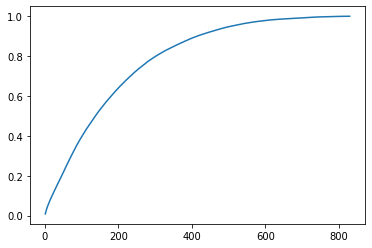

In [12]:
plt.plot(cdf.index, cdf.cumsum() / cdf.cumsum().max())
plt.show()

In [18]:
threshold = 50

In [19]:
pInferiorTo50 = cdf[cdf.index < threshold].sum() / cdf.cumsum().max()
pInferiorTo50

0.21303781464311713

We have 21.3 % of our matches that have less than 50 matches to compute our statistics

In [20]:
df.shape[0] * pInferiorTo50

11121.0

In [26]:
df_with_mini_50 = df[(df['p_number_of_matches_used'] > threshold) & (df['o_number_of_matches_used'] > threshold)]

In [30]:
df_with_mini_50.shape[0]

32826

In [27]:
new_number_of_matches = df_with_mini_50['p_number_of_matches_used'].append(df_with_mini_50['o_number_of_matches_used'], ignore_index=True)

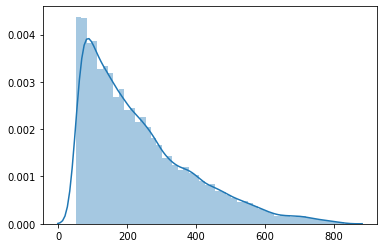

In [28]:
sns.distplot(new_number_of_matches)
plt.show()

In [31]:
cdf2 = new_number_of_matches.value_counts().sort_index()

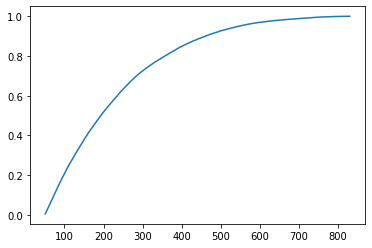

In [32]:
plt.plot(cdf2.index, cdf2.cumsum() / cdf2.cumsum().max())
plt.show()

We would lose too much data so we decide to keep those matches and to display an uncertainty to the user